<a href="https://colab.research.google.com/github/voidnire/Trabalho2-Sistemas-Operacionais/blob/main/Mult_Matrizes_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import re
import pandas as pd
from io import StringIO

### Dados Brutos

In [1]:
dados_raw="""
CSV_DATA;computador: linux_erin_6; tam_matriz: 500; n_threads: 1; n_cpus: 6; checksum: 61231.27; tp: 0.0; ts: 0.122659;

CSV_DATA;computador: linux_erin_6; tam_matriz: 500; n_threads: 4; n_cpus: 6; checksum: 61231.27; tp: 0.031606; ts: 0.0;

CSV_DATA;computador: linux_erin_6; tam_matriz: 500; n_threads: 8; n_cpus: 6; checksum: 61231.27; tp: 0.029588; ts: 0.0;

CSV_DATA;computador: linux_erin_6; tam_matriz: 500; n_threads: 16; n_cpus: 6; checksum: 61231.27; tp: 0.023091; ts: 0.0;

CSV_DATA;computador: linux_erin_6; tam_matriz: 500; n_threads: 32; n_cpus: 6; checksum: 61231.27; tp: 0.023906; ts: 0.0;

CSV_DATA;computador: linux_erin_6; tam_matriz: 1000; n_threads: 1; n_cpus: 6; checksum: 249868.49; tp: 0.0; ts: 1.033805;

CSV_DATA;computador: linux_erin_6; tam_matriz: 1000; n_threads: 4; n_cpus: 6; checksum: 249868.49; tp: 0.270204; ts: 0.0;

CSV_DATA;computador: linux_erin_6; tam_matriz: 1000; n_threads: 8; n_cpus: 6; checksum: 249868.49; tp: 0.206944; ts: 0.0;

CSV_DATA;computador: linux_erin_6; tam_matriz: 1000; n_threads: 16; n_cpus: 6; checksum: 249868.49; tp: 0.182896; ts: 0.0;

CSV_DATA;computador: linux_erin_6; tam_matriz: 1000; n_threads: 32; n_cpus: 6; checksum: 249868.49; tp: 0.182774; ts: 0.0;

CSV_DATA;computador: linux_erin_6; tam_matriz: 2000; n_threads: 1; n_cpus: 6; checksum: 1015269.71; tp: 0.0; ts: 8.556279;

CSV_DATA;computador: linux_erin_6; tam_matriz: 2000; n_threads: 4; n_cpus: 6; checksum: 1015269.71; tp: 2.223440; ts: 0.0;

CSV_DATA;computador: linux_erin_6; tam_matriz: 2000; n_threads: 8; n_cpus: 6; checksum: 1015269.71; tp: 1.641295; ts: 0.0;

CSV_DATA;computador: linux_erin_6; tam_matriz: 2000; n_threads: 16; n_cpus: 6; checksum: 1015269.71; tp: 1.650738; ts: 0.0;

CSV_DATA;computador: linux_erin_6; tam_matriz: 2000; n_threads: 32; n_cpus: 6; checksum: 1015269.71; tp: 1.651598; ts: 0.0;

CSV_DATA;computador: linux_erin_6; tam_matriz: 3000; n_threads: 1; n_cpus: 6; checksum: 2270672.15; tp: 0.0; ts: 29.260502;

CSV_DATA;computador: linux_erin_6; tam_matriz: 3000; n_threads: 4; n_cpus: 6; checksum: 2270672.15; tp: 7.617514; ts: 0.0;

CSV_DATA;computador: linux_erin_6; tam_matriz: 3000; n_threads: 8; n_cpus: 6; checksum: 2270672.15; tp: 6.682006; ts: 0.0;

CSV_DATA;computador: linux_erin_6; tam_matriz: 3000; n_threads: 16; n_cpus: 6; checksum: 2270672.15; tp: 6.602044; ts: 0.0;

CSV_DATA;computador: linux_erin_6; tam_matriz: 3000; n_threads: 32; n_cpus: 6; checksum: 2270672.15; tp: 6.403265; ts: 0.0;

CSV_DATA;computador: gitspace_erin_2; tam_matriz: 500; n_threads: 1; n_cpus: 2; checksum: 61231.27; tp: 0.0; ts: 0.113187;

CSV_DATA;computador: gitspace_erin_2; tam_matriz: 500; n_threads: 4; n_cpus: 2; checksum: 61231.27; tp: 0.061189; ts: 0.0;

CSV_DATA;computador: gitspace_erin_2; tam_matriz: 500; n_threads: 8; n_cpus: 2; checksum: 61231.27; tp: 0.062018; ts: 0.0;

CSV_DATA;computador: gitspace_erin_2; tam_matriz: 500; n_threads: 16; n_cpus: 2; checksum: 61231.27; tp: 0.063881; ts: 0.0;

CSV_DATA;computador: gitspace_erin_2; tam_matriz: 500; n_threads: 32; n_cpus: 2; checksum: 61231.27; tp: 0.063376; ts: 0.0;

CSV_DATA;computador: gitspace_erin_2; tam_matriz: 1000; n_threads: 1; n_cpus: 2; checksum: 249868.49; tp: 0.0; ts: 0.926434;

CSV_DATA;computador: gitspace_erin_2; tam_matriz: 1000; n_threads: 4; n_cpus: 2; checksum: 249868.49; tp: 0.533605; ts: 0.0;

CSV_DATA;computador: gitspace_erin_2; tam_matriz: 1000; n_threads: 8; n_cpus: 2; checksum: 249868.49; tp: 0.657184; ts: 0.0;

CSV_DATA;computador: gitspace_erin_2; tam_matriz: 1000; n_threads: 16; n_cpus: 2; checksum: 249868.49; tp: 0.527314; ts: 0.0;

CSV_DATA;computador: gitspace_erin_2; tam_matriz: 1000; n_threads: 32; n_cpus: 2; checksum: 249868.49; tp: 0.520738; ts: 0.0;

CSV_DATA;computador: gitspace_erin_2; tam_matriz: 2000; n_threads: 1; n_cpus: 2; checksum: 1015269.71; tp: 0.0; ts: 7.673572;

CSV_DATA;computador: gitspace_erin_2; tam_matriz: 2000; n_threads: 4; n_cpus: 2; checksum: 1015269.71; tp: 4.343094; ts: 0.0;

CSV_DATA;computador: gitspace_erin_2; tam_matriz: 2000; n_threads: 8; n_cpus: 2; checksum: 1015269.71; tp: 4.083553; ts: 0.0;

CSV_DATA;computador: gitspace_erin_2; tam_matriz: 2000; n_threads: 16; n_cpus: 2; checksum: 1015269.71; tp: 4.327256; ts: 0.0;

CSV_DATA;computador: gitspace_erin_2; tam_matriz: 2000; n_threads: 32; n_cpus: 2; checksum: 1015269.71; tp: 4.100888; ts: 0.0;

CSV_DATA;computador: gitspace_erin_2; tam_matriz: 3000; n_threads: 1; n_cpus: 2; checksum: 2270672.15; tp: 0.0; ts: 25.638622;

CSV_DATA;computador: gitspace_erin_2; tam_matriz: 3000; n_threads: 4; n_cpus: 2; checksum: 2270672.15; tp: 14.176969; ts: 0.0;

CSV_DATA;computador: gitspace_erin_2; tam_matriz: 3000; n_threads: 8; n_cpus: 2; checksum: 2270672.15; tp: 13.926792; ts: 0.0;

CSV_DATA;computador: gitspace_erin_2; tam_matriz: 3000; n_threads: 16; n_cpus: 2; checksum: 2270672.15; tp: 13.894472; ts: 0.0;

CSV_DATA;computador: gitspace_erin_2; tam_matriz: 3000; n_threads: 32; n_cpus: 2; checksum: 2270672.15; tp: 13.883380; ts: 0.0;
"""

# Geração do Dataset

In [3]:
# Parsing
parsed_data = []
for line in dados_raw.strip().split('\n'):
    if not line.strip() or 'CSV_DATA' not in line:
        continue

    # Remove o marcador inicial e divide por ponto e vírgula
    parts = line.replace('CSV_DATA;', '').split(';')

    row = {}
    for part in parts:
        if ':' in part:
            key, value = part.split(':')
            row[key.strip()] = value.strip()
    parsed_data.append(row)

In [4]:
df = pd.DataFrame(parsed_data)
df

,computador,tam_matriz,n_threads,n_cpus,checksum,tp,ts
0,linux_erin_6,500,1,6,61231.27,0.0,0.122659
1,linux_erin_6,500,4,6,61231.27,0.031606,0.0
2,linux_erin_6,500,8,6,61231.27,0.029588,0.0
3,linux_erin_6,500,16,6,61231.27,0.023091,0.0
4,linux_erin_6,500,32,6,61231.27,0.023906,0.0
5,linux_erin_6,1000,1,6,249868.49,0.0,1.033805
6,linux_erin_6,1000,4,6,249868.49,0.270204,0.0
7,linux_erin_6,1000,8,6,249868.49,0.206944,0.0
8,linux_erin_6,1000,16,6,249868.49,0.182896,0.0
9,linux_erin_6,1000,32,6,249868.49,0.182774,0.0


In [5]:
cols_int = ['tam_matriz', 'n_threads', 'n_cpus']
cols_float = ['checksum', 'tp', 'ts']

In [6]:
for col in cols_int:
    df[col] = df[col].astype(int)

for col in cols_float:
    df[col] = df[col].astype(float)

### Formatando Tempo Sequencial

In [7]:
# Associar o tempo sequencial (Ts) às linhas paralelas
# extrair apenas as linhas sequenciais (n_threads == 1)
df_seq = df[df['n_threads'] == 1][['computador', 'tam_matriz', 'ts']].copy()
df_seq.rename(columns={'ts': 'ts_ref'}, inplace=True)
df_seq

,computador,tam_matriz,ts_ref
0,linux_erin_6,500,0.122659
5,linux_erin_6,1000,1.033805
10,linux_erin_6,2000,8.556279
15,linux_erin_6,3000,29.260502
20,gitspace_erin_2,500,0.113187
25,gitspace_erin_2,1000,0.926434
30,gitspace_erin_2,2000,7.673572
35,gitspace_erin_2,3000,25.638622


In [8]:
#  MERGE com o dataframe original
df_final = pd.merge(df, df_seq, on=['computador', 'tam_matriz'], how='left')

In [9]:
df_final['tempo_execucao'] = df_final.apply(
    lambda row: row['ts'] if row['n_threads'] == 1 else row['tp'], axis=1
)
df_final.head()

,computador,tam_matriz,n_threads,n_cpus,checksum,tp,ts,ts_ref,tempo_execucao
0,linux_erin_6,500,1,6,61231.27,0.000000,0.122659,0.122659,0.122659
1,linux_erin_6,500,4,6,61231.27,0.031606,0.000000,0.122659,0.031606
2,linux_erin_6,500,8,6,61231.27,0.029588,0.000000,0.122659,0.029588
3,linux_erin_6,500,16,6,61231.27,0.023091,0.000000,0.122659,0.023091
4,linux_erin_6,500,32,6,61231.27,0.023906,0.000000,0.122659,0.023906


### Speedup e Eficiência

In [10]:
# Aceleração (Speedup) = Ts / Tp
# Para a linha sequencial, será Ts/Ts = 1
df_final['aceleracao'] = df_final['ts_ref'] / df_final['tempo_execucao']
df_final.head()

,computador,tam_matriz,n_threads,n_cpus,checksum,tp,ts,ts_ref,tempo_execucao,aceleracao
0,linux_erin_6,500,1,6,61231.27,0.000000,0.122659,0.122659,0.122659,1.000000
1,linux_erin_6,500,4,6,61231.27,0.031606,0.000000,0.122659,0.031606,3.880877
2,linux_erin_6,500,8,6,61231.27,0.029588,0.000000,0.122659,0.029588,4.145566
3,linux_erin_6,500,16,6,61231.27,0.023091,0.000000,0.122659,0.023091,5.311983
4,linux_erin_6,500,32,6,61231.27,0.023906,0.000000,0.122659,0.023906,5.130888


In [11]:
# Eficiência = Aceleração / Número de Threads
df_final['eficiencia'] = df_final['aceleracao'] / df_final['n_threads']


In [14]:
colunas_exibicao = ['computador', 'tam_matriz', 'n_threads', 'tempo_execucao', 'ts_ref', 'aceleracao', 'eficiencia']
print("--- Dataset Processado ---")
df_final[colunas_exibicao]

--- Dataset Processado ---


,computador,tam_matriz,n_threads,tempo_execucao,ts_ref,aceleracao,eficiencia
0,linux_erin_6,500,1,0.122659,0.122659,1.000000,1.000000
1,linux_erin_6,500,4,0.031606,0.122659,3.880877,0.970219
2,linux_erin_6,500,8,0.029588,0.122659,4.145566,0.518196
3,linux_erin_6,500,16,0.023091,0.122659,5.311983,0.331999
4,linux_erin_6,500,32,0.023906,0.122659,5.130888,0.160340
5,linux_erin_6,1000,1,1.033805,1.033805,1.000000,1.000000
6,linux_erin_6,1000,4,0.270204,1.033805,3.826017,0.956504
7,linux_erin_6,1000,8,0.206944,1.033805,4.995579,0.624447
8,linux_erin_6,1000,16,0.182896,1.033805,5.652420,0.353276
9,linux_erin_6,1000,32,0.182774,1.033805,5.656193,0.176756


# Visualização em Gráficos

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = [10, 6] # Tamanho padrão dos gráficos
df_final.head()

,computador,tam_matriz,n_threads,n_cpus,checksum,tp,ts,ts_ref,tempo_execucao,aceleracao,eficiencia
0,linux_erin_6,500,1,6,61231.27,0.000000,0.122659,0.122659,0.122659,1.000000,1.000000
1,linux_erin_6,500,4,6,61231.27,0.031606,0.000000,0.122659,0.031606,3.880877,0.970219
2,linux_erin_6,500,8,6,61231.27,0.029588,0.000000,0.122659,0.029588,4.145566,0.518196
3,linux_erin_6,500,16,6,61231.27,0.023091,0.000000,0.122659,0.023091,5.311983,0.331999
4,linux_erin_6,500,32,6,61231.27,0.023906,0.000000,0.122659,0.023906,5.130888,0.160340


### Tempo de Execução x Tamanho da Matriz

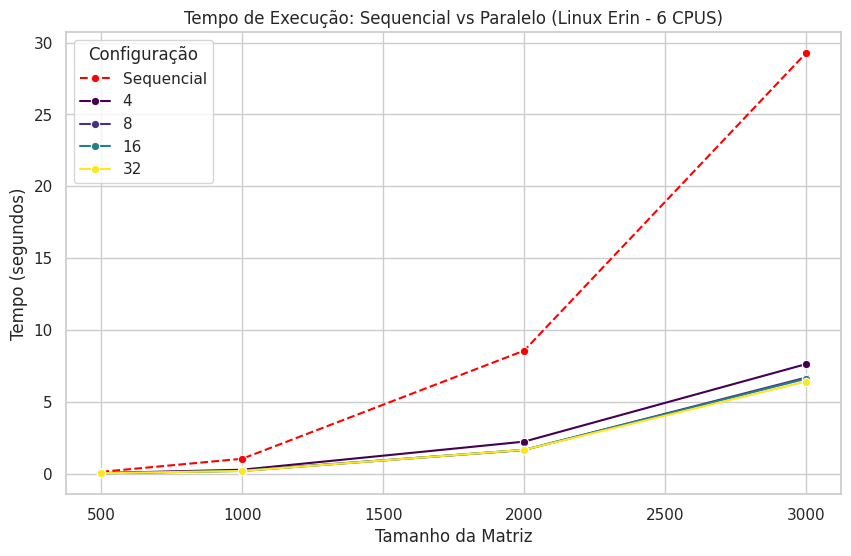

In [17]:
# DADOS DO LINUX ERIN

df_linux = df_final[df_final['computador'] == 'linux_erin_6']
plt.figure()

# linha Sequencial (n_threads = 1)
sns.lineplot(
    data=df_linux[df_linux['n_threads'] == 1],
    x='tam_matriz',
    y='tempo_execucao',
    label='Sequencial',
    marker='o',
    color='red',
    linestyle='--'
)


sns.lineplot(
    data=df_linux[df_linux['n_threads'] > 1],
    x='tam_matriz',
    y='tempo_execucao',
    hue='n_threads',
    marker='o',
    palette='viridis'
)

plt.title('Tempo de Execução: Sequencial vs Paralelo (Linux Erin - 6 CPUS)')
plt.xlabel('Tamanho da Matriz')
plt.ylabel('Tempo (segundos)')
plt.legend(title='Configuração')
plt.show()

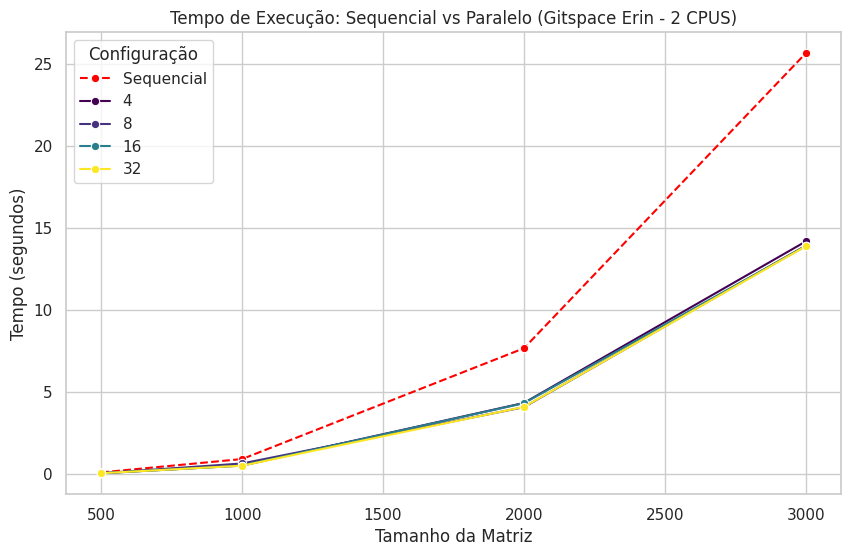

In [18]:
# DADOS DO GITSPACE ERIN
df_git = df_final[df_final['computador'] == 'gitspace_erin_2']
plt.figure()

# linha Sequencial (n_threads = 1)
sns.lineplot(
    data=df_git[df_git['n_threads'] == 1],
    x='tam_matriz',
    y='tempo_execucao',
    label='Sequencial',
    marker='o',
    color='red',
    linestyle='--'
)


sns.lineplot(
    data=df_git[df_git['n_threads'] > 1],
    x='tam_matriz',
    y='tempo_execucao',
    hue='n_threads',
    marker='o',
    palette='viridis'
)

plt.title('Tempo de Execução: Sequencial vs Paralelo (Gitspace Erin - 2 CPUS)')
plt.xlabel('Tamanho da Matriz')
plt.ylabel('Tempo (segundos)')
plt.legend(title='Configuração')
plt.show()

### Aceleração (Speedup) x Número de Threads

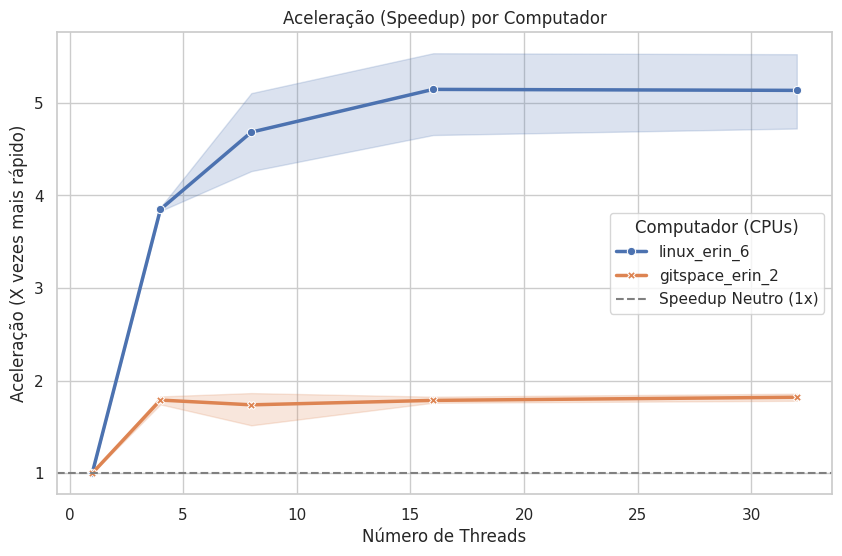

In [19]:
# apenas o maior vetor (onde o overhead impacta menos)
#df_maior_matriz = df_final[df_final['tam_vetor'] == 10000]

plt.figure()

# Plotar Speedup
sns.lineplot(
    data=df_final,
    x='n_threads',
    y='aceleracao',
    hue='computador', # Diferencia as CPUs pelas cores
    style='computador',
    markers=True,
    dashes=False,
    linewidth=2.5
)

#  linha de referência "Speedup Ideal" (Linear)
# O ideal seria y = x, mas raramente atingimos isso.
# uma linha horizontal em y=1 (ponto de neutralidade)
plt.axhline(y=1, color='gray', linestyle='--', label='Speedup Neutro (1x)')

plt.title('Aceleração (Speedup) por Computador')
plt.xlabel('Número de Threads')
plt.ylabel('Aceleração (X vezes mais rápido)')
plt.legend(title='Computador (CPUs)')
plt.show()

### Speedup e Eficiência

In [21]:
tabela_speedup = df_final.pivot_table(
    values='aceleracao',
    index=['computador', 'n_threads'],
    columns='tam_matriz'
)

tabela_speedup

tam_matriz                     500       1000      2000      3000
computador      n_threads                                        
gitspace_erin_2 1          1.000000  1.000000  1.000000  1.000000
                4          1.849793  1.736179  1.766845  1.808470
                8          1.825067  1.409703  1.879141  1.840957
                16         1.771841  1.756892  1.773311  1.845239
                32         1.785960  1.779079  1.871198  1.846713
linux_erin_6    1          1.000000  1.000000  1.000000  1.000000
                4          3.880877  3.826017  3.848217  3.841214
                8          4.145566  4.995579  5.213127  4.379000
                16         5.311983  5.652420  5.183305  4.432037
                32         5.130888  5.656193  5.180606  4.569622

In [22]:
tabela_eficiencia = df_final.pivot_table(
    values='eficiencia',
    index=['computador', 'n_threads'],
    columns='tam_matriz'
)
# eficiência perto de 1.0 é excelente. Perto de 0.1 é ruim.
tabela_eficiencia

tam_matriz                     500       1000      2000      3000
computador      n_threads                                        
gitspace_erin_2 1          1.000000  1.000000  1.000000  1.000000
                4          0.462448  0.434045  0.441711  0.452117
                8          0.228133  0.176213  0.234893  0.230120
                16         0.110740  0.109806  0.110832  0.115327
                32         0.055811  0.055596  0.058475  0.057710
linux_erin_6    1          1.000000  1.000000  1.000000  1.000000
                4          0.970219  0.956504  0.962054  0.960304
                8          0.518196  0.624447  0.651641  0.547375
                16         0.331999  0.353276  0.323957  0.277002
                32         0.160340  0.176756  0.161894  0.142801